# Data Preparation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

#load the data from csv files
cities = pd.read_csv('/content/drive/MyDrive/Codebasics_ResumePort/dim_cities.csv')
repondents = pd.read_csv('/content/drive/MyDrive/Codebasics_ResumePort/dim_repondents.csv')
survey_responses = pd.read_csv('/content/drive/MyDrive/Codebasics_ResumePort/fact_survey_responses.csv')

#display the first few rows of the dataframe

(cities.head(), repondents.head(), survey_responses.head())

(  City_ID       City    Tier
 0   CT111      Delhi  Tier 1
 1   CT112     Mumbai  Tier 1
 2   CT113  Bangalore  Tier 1
 3   CT114    Chennai  Tier 1
 4   CT115    Kolkata  Tier 2,
    Respondent_ID            Name    Age  Gender City_ID
 0         120031  Aniruddh Issac  15-18  Female   CT117
 1         120032     Trisha Rout  19-30    Male   CT118
 2         120033    Yuvraj  Virk  15-18    Male   CT116
 3         120034    Pranay Chand  31-45  Female   CT113
 4         120035  Mohanlal Joshi  19-30  Female   CT120,
    Response_ID  Respondent_ID  Consume_frequency  \
 0       103001         120031   2-3 times a week   
 1       103002         120032  2-3 times a month   
 2       103003         120033             Rarely   
 3       103004         120034   2-3 times a week   
 4       103005         120035              Daily   
 
                       Consume_time              Consume_reason Heard_before  \
 0  To stay awake during work/study  Increased energy and focus          Yes

In [5]:
#join thetable on the respective keys

data = (
        survey_responses.merge(repondents, how='left', on='Respondent_ID')
        .merge(cities, how='left', on='City_ID')
)
# Displaythe first few rows of the merged dataframe
pd.set_option('display.max_columns', None)
data.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,Availability,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,Availability,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,Availability,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,Other,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,Other,Sky 9,Other,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2


In [6]:
data['Improvements_desired'].value_counts()

,count
Improvements_desired,
Reduced sugar content,2995
More natural ingredients,2498
Wider range of flavors,2037
Healthier alternatives,1472
Other,998


# Sense Check

In [7]:
#Checkfor inconsistent Responses

inconsistent_responses = data[(data['Heard_before' ] == 'No') & (data['Taste_experience'] != 0)]
inconsistent_responses.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,Availability,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,Availability,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,Other,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1
6,103007,120037,2-3 times a month,To stay awake during work/study,Increased energy and focus,No,Positive,Not sure,No,4,Health concerns,Cola-Coka,Brand reputation,Other,Guarana,Yes,No,Online ads,Innovative bottle design,Yes,100-150,Other,Sports/exercise,Oorja Anne,19-30,Male,CT112,Mumbai,Tier 1
7,103008,120038,Rarely,Before exercise,To combat fatigue,No,Neutral,Healthy,Yes,4,Unfamiliar with the brand,Gangster,Brand reputation,Reduced sugar content,Sugar,Yes,Not Sure,Online ads,Compact and portable cans,Yes,50-99,Gyms and fitness centers,Social outings/parties,Rhea Khanna,19-30,Male,CT116,Hyderabad,Tier 1


The initial sense-check reveals some inconsistencies in the responses. There are respondents who reported that they hadn't heard about the drink but still provided a taste experience rating. This could indicate insincere or mistaken responses.

A potential approach to handle this could be to treat these inconsistent records as missing data or outliers, and exclude them from the analysis.

In [8]:
#count the number of inconsistent responses

num_of_inconsistent_responses = len(inconsistent_responses)

#Calculate the percentage of inconsistant responses
percentage_of_inconsistent_responses = (num_of_inconsistent_responses / len(data)) * 100

num_of_inconsistent_responses, percentage_of_inconsistent_responses

(5553, 55.53)

# Primary Insights

## Demographic Insights

### Who are the respondents ?

In [9]:
#Count the number of responses my gender

gender_preferences = data['Gender'].value_counts()

gender_preferences

,count
Gender,
Male,6038
Female,3455
Non-binary,507


<function matplotlib.pyplot.show(close=None, block=None)>

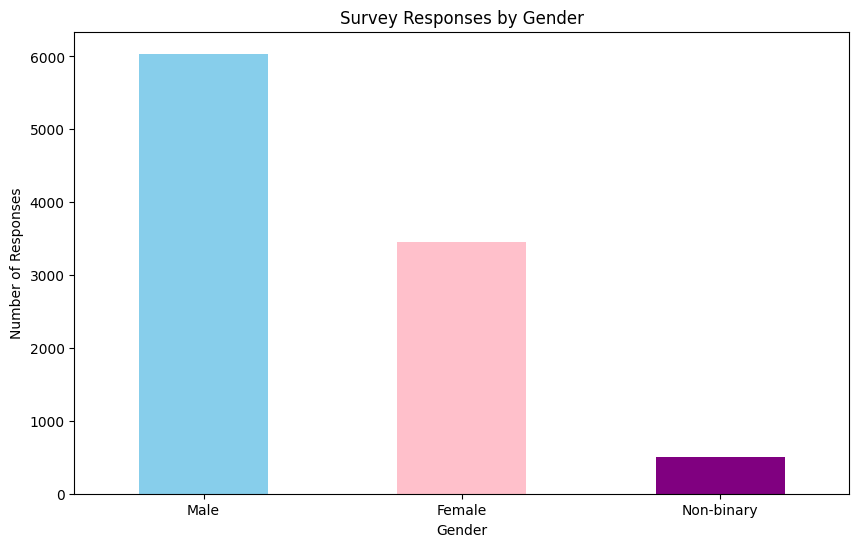

In [10]:
import matplotlib.pyplot as plt

# Create a bar plot for Gender perferences

plt.figure(figsize=(10,6))
gender_preferences.plot(kind='bar', color =['skyblue', 'pink', 'purple'])
plt.title('Survey Responses by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Responses')
plt.xticks (rotation = 0)
plt.show

In [11]:
#count the number of responses by age

age_preferences = data['Age'].value_counts()

age_preferences

,count
Age,
19-30,5520
31-45,2376
15-18,1488
46-65,426
65+,190


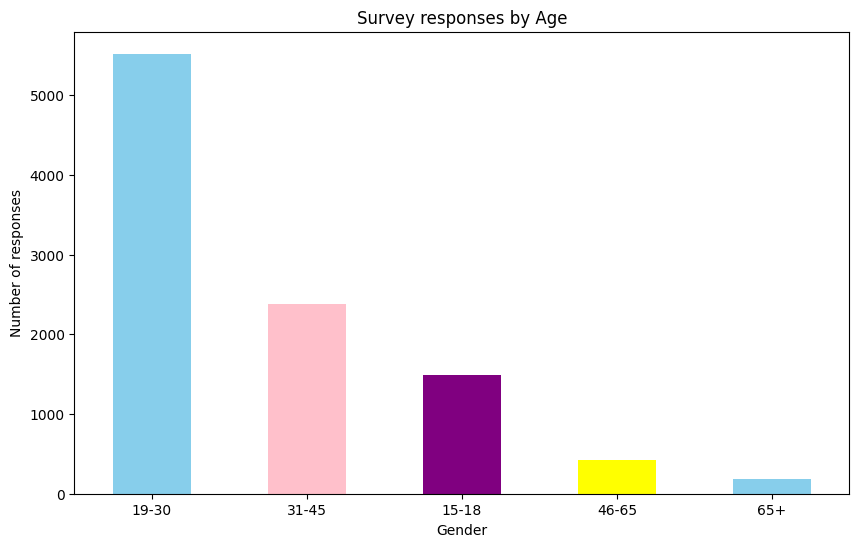

In [12]:
# Create a bar chart for gender preferences

plt.figure(figsize =(10,6))
age_preferences.plot(kind='bar', color =['skyblue', 'pink', 'purple','yellow'])
plt.title('Survey responses by Age')
plt.xlabel('Gender')
plt.ylabel('Number of responses')
plt.xticks(rotation = 0)
plt.show()

In [13]:
#group the data by 'Gender' and 'Age' and calculate the count

gender_age = data.groupby(['Gender','Age'])['Response_ID'].count().unstack()

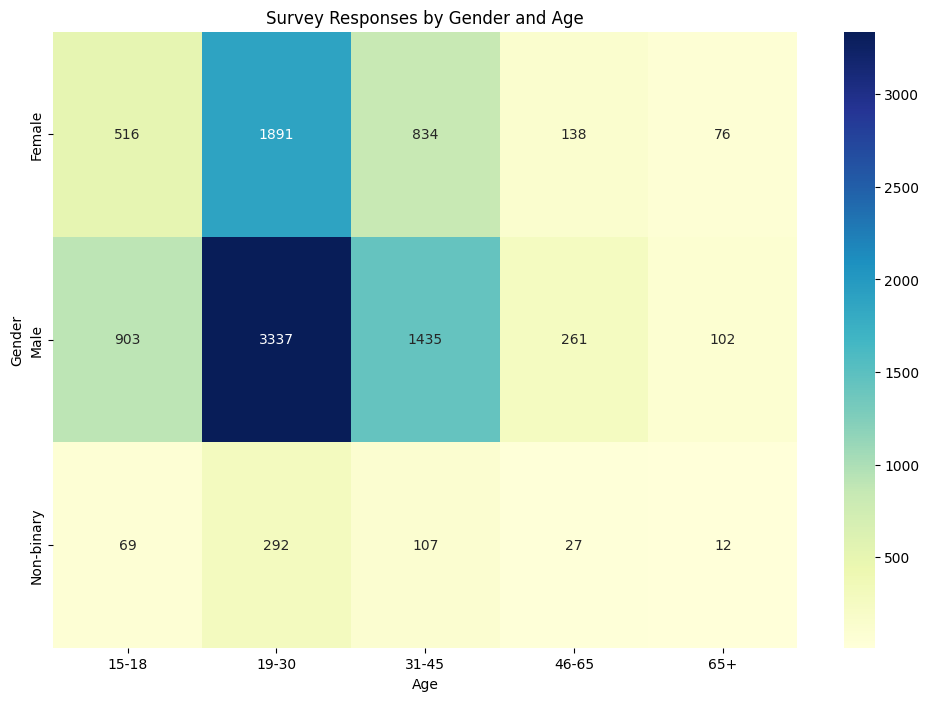

In [14]:
#plotting  the consumption frequency in the heat map

import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(gender_age, annot=True, cmap="YlGnBu" ,fmt ='g')
plt.title('Survey Responses by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

#Who drinks most frequently

In [15]:
# calculate the percentage of each gender group that prefers energy drink

consume_frequency = ['Daily',"2-3 times a week"]

gender_preference = data[data['Consume_frequency'].isin(consume_frequency)].groupby('Gender').size()
gender_total = data['Gender'].value_counts()
gender_preference_percentage = (gender_preference / gender_total) * 100

gender_preference_percentage

,0
Gender,
Female,48.712012
Male,48.211328
Non-binary,47.928994


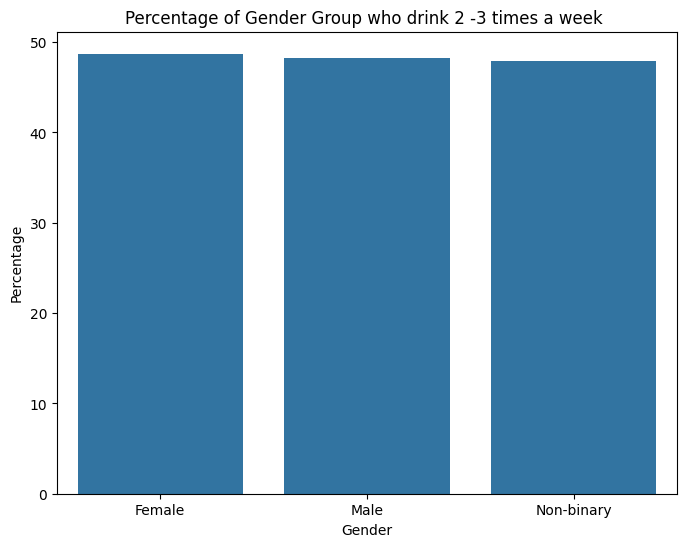

In [16]:
#plot the percentage of each gender group

import seaborn as sns
plt.figure(figsize =(8,6))
sns.barplot(x = gender_preference_percentage.index, y = gender_preference_percentage.values)
plt.title("Percentage of Gender Group who drink 2 -3 times a week ")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

In [17]:
#calculate the percentage of each age group that consumes energy drinks

consume_frequency = ['Daily',"2-3 times a week"]

age_preference = data[data['Consume_frequency'].isin(consume_frequency)].groupby('Age').size()
age_total = data['Age'].value_counts()
Age_drinking_frequency = (age_preference / age_total) * 100

Age_drinking_frequency

,0
Age,
15-18,49.395161
19-30,48.061594
31-45,48.695286
46-65,46.244131
65+,50.000000


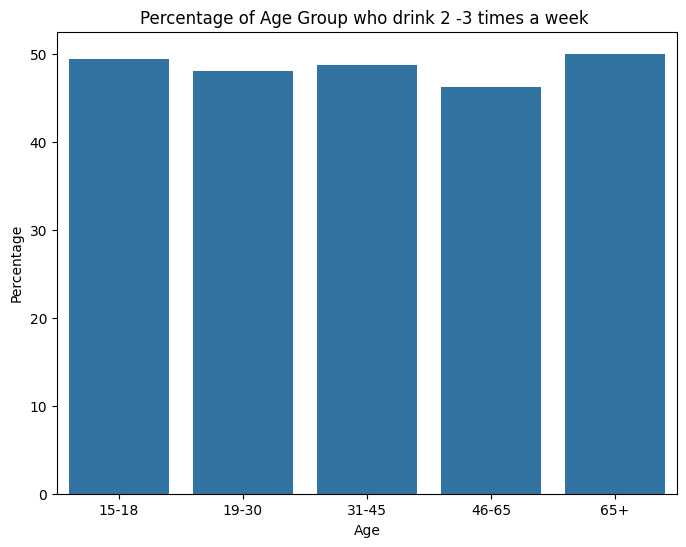

In [18]:
#plotting the percentage of each age group

import seaborn as sns
plt.figure(figsize =(8,6))
sns.barplot(x = Age_drinking_frequency.index, y = Age_drinking_frequency.values)
plt.title("Percentage of Age Group who drink 2 -3 times a week ")
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.show()

In [19]:
age_preference = data[data['Consume_frequency'].isin(consume_frequency)].groupby(['Gender','Age']).size()

age_preference

Gender      Age  
Female      15-18     255
            19-30     924
            31-45     404
            46-65      64
            65+        36
Male        15-18     443
            19-30    1590
            31-45     705
            46-65     120
            65+        53
Non-binary  15-18      37
            19-30     139
            31-45      48
            46-65      13
            65+         6
dtype: int64

In [20]:
#calculate the count of respondents for each combination of gender and age group
gender_age_counts = data.groupby(['Gender', 'Age']).size().reset_index(name='Count')

gender_age_counts

,Gender,Age,Count
0,Female,15-18,516
1,Female,19-30,1891
2,Female,31-45,834
3,Female,46-65,138
4,Female,65+,76
5,Male,15-18,903
6,Male,19-30,3337
7,Male,31-45,1435
8,Male,46-65,261
9,Male,65+,102


In [21]:
#calaculate the count of respondents for each combination of gender and age group
gender_age_counts = data.groupby(['Gender', 'Age']).size().reset_index(name='Count')

#Find the combination with the highest Count
most_preferred_combination = gender_age_counts[gender_age_counts['Count'] == gender_age_counts['Count']]

#Divide the count column with total number of genders

gender_counts = data['Gender'].value_counts()
most_preferred_combination['Percentage'] = most_preferred_combination.apply(lambda row: row["Count"] / gender_counts[row['Gender']],axis =1)

most_preferred_combination

,Gender,Age,Count,Percentage
0,Female,15-18,516,0.149349
1,Female,19-30,1891,0.547323
2,Female,31-45,834,0.241389
3,Female,46-65,138,0.039942
4,Female,65+,76,0.021997
5,Male,15-18,903,0.149553
6,Male,19-30,3337,0.552666
7,Male,31-45,1435,0.237661
8,Male,46-65,261,0.043226
9,Male,65+,102,0.016893


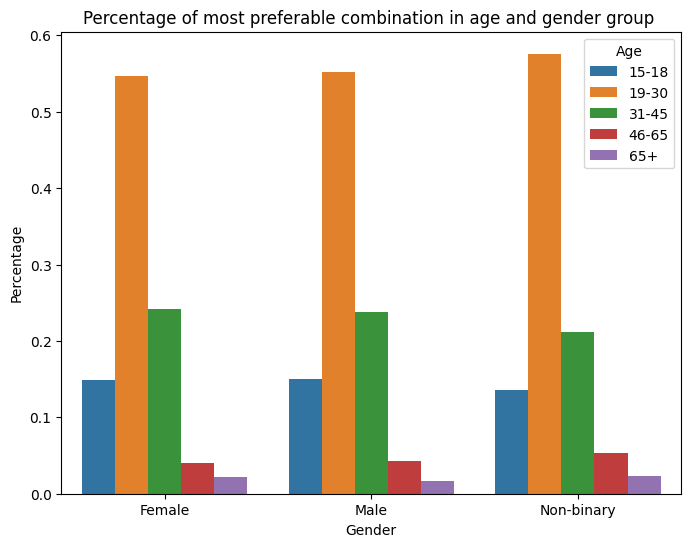

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#ploting the percentage count as bar chart
plt.figure(figsize =(8,6))
sns.barplot(x='Gender',y="Percentage",hue = "Age",data=most_preferred_combination)
plt.title("Percentage of most preferable combination in age and gender group ")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

In [23]:
#Grouping the data by 'Gender' and 'Age' and calculating consume frquency count

gender_age_consume =data.groupby(['Gender','Age'])['Consume_frequency'].value_counts().unstack().fillna(0)

gender_age_consume

Consume_frequency  2-3 times a month  2-3 times a week  Daily  Once a week  \
Gender     Age                                                               
Female     15-18                  74               198     57           78   
           19-30                 301               652    272          311   
           31-45                 144               292    112          125   
           46-65                  19                48     16           33   
           65+                    11                27      9           14   
Male       15-18                 147               312    131          156   
           19-30                 531              1159    431          533   
           31-45                 236               488    217          221   
           46-65                  41                95     25           48   
           65+                    13                40     13           15   
Non-binary 15-18                  11                29      8           10   
           19-30                  59               106     33           44   
           31-45                  18                29     19           15   
           46-65                   6                12      1            5   
           65+                     2                 4      2            1   

Consume_frequency  Rarely  
Gender     Age             
Female     15-18      109  
           19-30      355  
           31-45      161  
           46-65       22  
           65+         15  
Male       15-18      157  
           19-30      683  
           31-45      273  
           46-65       52  
           65+         21  
Non-binary 15-18       11  
           19-30       50  
           31-45       26  
           46-65        3  
           65+          3

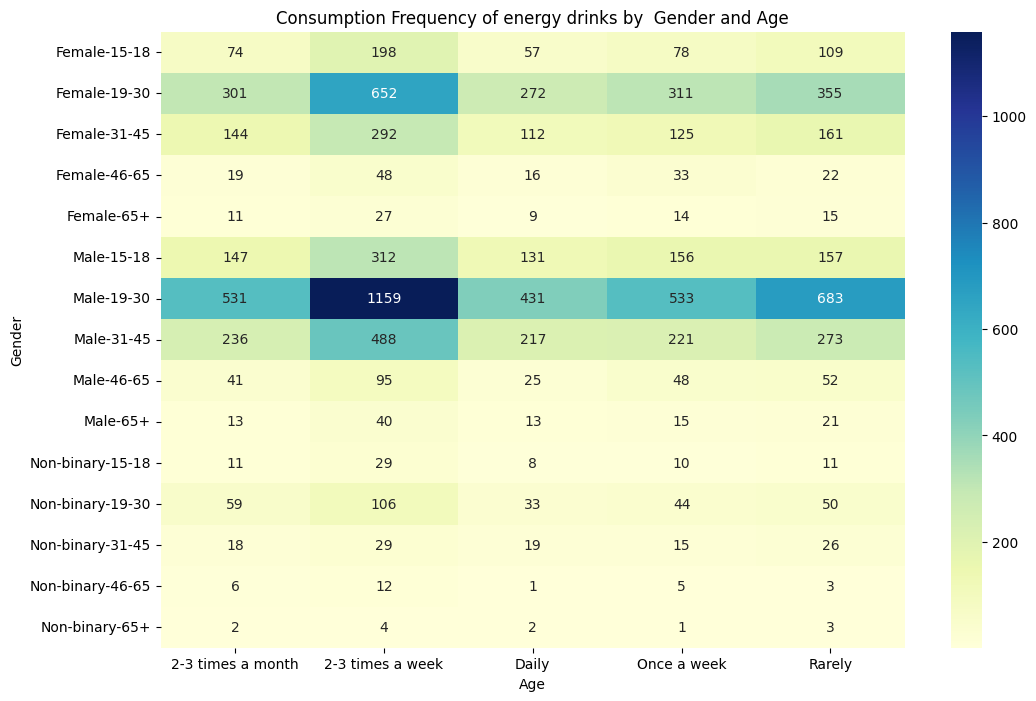

In [24]:
#Creating a plot for consumption frquency in a heatmap

plt.figure(figsize=(12,8))
sns.heatmap(gender_age_consume, annot=True, cmap="YlGnBu",fmt ='g')
plt.title('Consumption Frequency of energy drinks by  Gender and Age')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

In [25]:
#Calculate the percentage of each consumption frequency with a category within each gender and age group combination

gender_age_consume_percentage = gender_age_consume.div(gender_age_consume.sum(axis=1), axis=0) * 100

gender_age_consume_percentage

Consume_frequency  2-3 times a month  2-3 times a week      Daily  \
Gender     Age                                                      
Female     15-18           14.341085         38.372093  11.046512   
           19-30           15.917504         34.479112  14.383924   
           31-45           17.266187         35.011990  13.429257   
           46-65           13.768116         34.782609  11.594203   
           65+             14.473684         35.526316  11.842105   
Male       15-18           16.279070         34.551495  14.507198   
           19-30           15.912496         34.731795  12.915793   
           31-45           16.445993         34.006969  15.121951   
           46-65           15.708812         36.398467   9.578544   
           65+             12.745098         39.215686  12.745098   
Non-binary 15-18           15.942029         42.028986  11.594203   
           19-30           20.205479         36.301370  11.301370   
           31-45           16.822430         27.102804  17.757009   
           46-65           22.222222         44.444444   3.703704   
           65+             16.666667         33.333333  16.666667   

Consume_frequency  Once a week     Rarely  
Gender     Age                             
Female     15-18     15.116279  21.124031  
           19-30     16.446325  18.773136  
           31-45     14.988010  19.304556  
           46-65     23.913043  15.942029  
           65+       18.421053  19.736842  
Male       15-18     17.275748  17.386489  
           19-30     15.972430  20.467486  
           31-45     15.400697  19.024390  
           46-65     18.390805  19.923372  
           65+       14.705882  20.588235  
Non-binary 15-18     14.492754  15.942029  
           19-30     15.068493  17.123288  
           31-45     14.018692  24.299065  
           46-65     18.518519  11.111111  
           65+        8.333333  25.000000

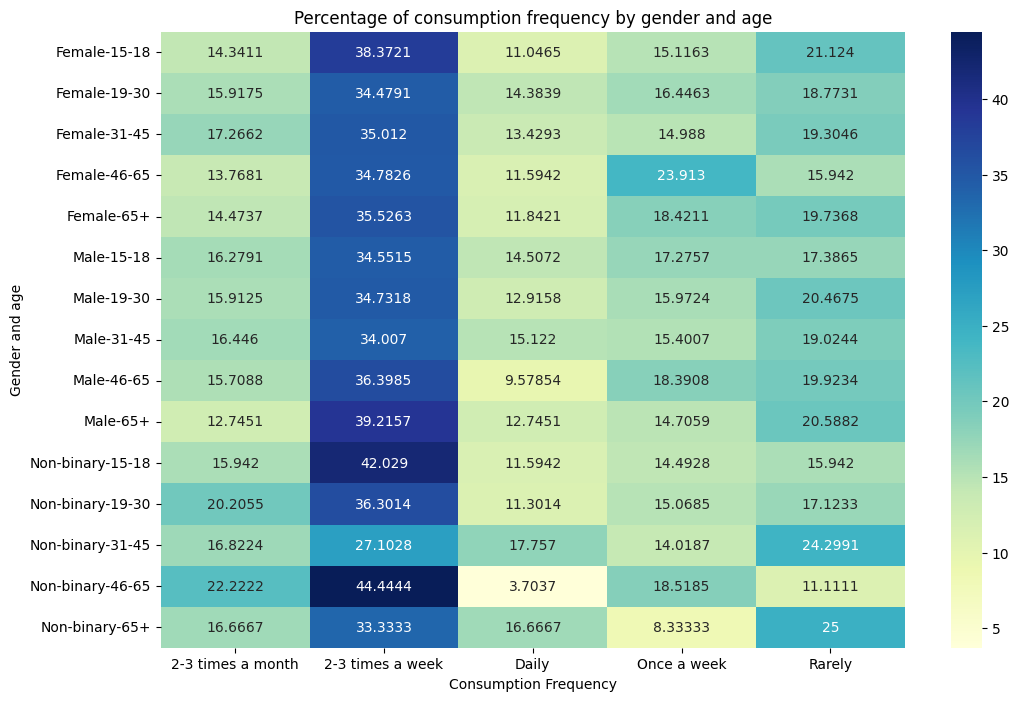

In [26]:
#Plot the consumption frequency in heatmap

plt.figure(figsize=(12,8))
sns.heatmap(gender_age_consume_percentage, annot=True, cmap="YlGnBu",fmt ='g')
plt.title('Percentage of consumption frequency by gender and age')
plt.xlabel('Consumption Frequency')
plt.ylabel('Gender and age')
plt.show()

### Who has a negative perception towards energy drinks yet still drinks on a regular basis?

In [27]:
data['General_perception'].value_counts()

,count
General_perception,
Effective,2909
Not sure,2610
Healthy,2243
Dangerous,2238


In [32]:
#filtering th gender perception
filtered_responses = data[data['General_perception'].isin(['Not sure','Dangerous'])]

#Group by gender and count responses
gender_perception = filtered_responses.groupby('Gender')['General_perception'].value_counts().unstack()

#Add total column
gender_perception['Total'] = gender_perception.sum(axis=1)

gender_perception


General_perception,Dangerous,Not sure,Total
Gender,,,
Female,1016,1025,2041
Male,1133,1433,2566
Non-binary,89,152,241


<function matplotlib.pyplot.show(close=None, block=None)>

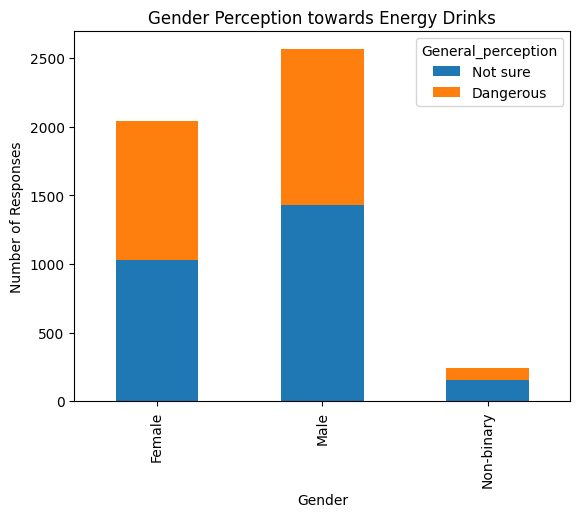

In [36]:
#Plot the perception

gender_perception[['Not sure','Dangerous']].plot(kind='bar', stacked=True)
plt.title('Gender Perception towards Energy Drinks')
plt.xlabel('Gender')
plt.ylabel('Number of Responses')
plt.show